This demonstrates all the steps in my candidate selection before conducting visual inspection

In [1]:
import numpy as np
import splat
import wisps.data_analysis as wispd
from wisps.data_analysis import selection_criteria as sel_crt
import shapey
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import wisps

import matplotlib as mpl

from tqdm import tqdm
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
#some functions 
def get_indices(x):
    if x is None :
        return pd.Series({})
    else:
        return  pd.concat([pd.Series(x.indices), pd.Series(x.mags), pd.Series(x.snr)])
    
def get_spt(x):
    if x is None:
        return np.nan
    else:
        return x.spectral_type[0]
#change f-test definition

def f_test_fx(x, df1, df2):
    return stats.f.cdf(x, df1, df2)

def box_parameters(idx, spt_range):
    bs=idx.shapes
    b=[x for x in bs if x.shape_name==spt_range][0]
    print ('{}  {} m: {} b: {} s:{}, comp : {}, cont: {}'.format(spt_range, idx,  round(b.coeffs[0], 2), round(b.coeffs[1], 2), round(b.scatter, 2), round(idx.completeness[spt_range], 2),  round(idx.contamination[spt_range], 3)))

In [6]:
#get data
alldata=pd.read_hdf(wisps.LIBRARIES+'/master_dataset.hdf',  key='new')

star_ids=alldata[alldata['class_star'] !=0]
stars=wisps.Annotator.reformat_table(star_ids).reset_index(drop=True)
spex=wisps.Annotator.reformat_table(wisps.datasets['spex'])

#cands=pd.read_hdf(wisps.OUTPUT_FILES+'/true_spectra_cands.hdf')
cands0=pd.read_hdf(wisps.LIBRARIES+'/objects_of_interest.hdf', key='all')
cands0=(cands0[~cands0.spectra.isna()]).reset_index(drop=True)
cands=cands0.spectra.apply(get_indices)
cands['grism_id']=cands0.grism_id
cands['spt']=cands0.spectra.apply(get_spt)
cands['line_chi']=cands0.spectra.apply(lambda x : x.line_chi)
cands['spex_chi']=cands0.spectra.apply(lambda x: x.spex_chi)

#cands_dff['f_test']=(cands_dff['spex_chi']/cands_dff['line_chi']).apply(f_test_fx)

cands=wisps.Annotator.reformat_table(cands)
cands=cands[(cands.spt >=17.) ]
cands=cands.reset_index(drop=True)





spex_df=wisps.Annotator.reformat_table(wisps.datasets['spex']).reset_index(drop=True)
manj=wisps.Annotator.reformat_table(wisps.datasets['manjavacas']).reset_index(drop=True)
schn=wisps.Annotator.reformat_table(wisps.datasets['schneider']).reset_index(drop=True)
ydwarfs=(manj[manj['spt'].apply(wisps.make_spt_number)>38].append(schn)).reset_index(drop=True)
spex_df['spt']=np.vstack(spex_df['spt'].values)[:,0]
manj['spt']=np.vstack(manj['spt'].values)[:,0]
schn['spt']=np.vstack(schn['spt'].values)[:,0]

cands.grism_id=cands.grism_id.apply(lambda x: x.lower())
stars.grism_id=stars.grism_id.apply(lambda x: x.lower())

cx=cands[cands.grism_id.isin(stars.grism_id)]
cy=stars[stars.grism_id.isin(cx.grism_id)]
cands['spt']=np.vstack(cands['spt'].values)
                           

In [51]:
spex['x']=spex.spex_chi/spex.line_chi
alldata['x']=alldata.spex_chi/alldata.line_chi
#ydwarfs['x']=ydwarfs.spex_chi/ydwarfs.line_chi
cands['x']=cands.spex_chi/cands.line_chi


cands['f_test']=f_test_fx(cands.x, 60-1, 60-2)
spex['f_test']=f_test_fx(spex.x, 169-1, 169-2)
alldata['f_test']=f_test_fx(alldata.x, 60-1, 60-2)

alldata=alldata.sort_values('x')
spex=spex.sort_values('x')
cands=cands.sort_values('x')


In [45]:
s=wisps.Spectrum(filename='par32-00075')

In [46]:
s.dof

60.0

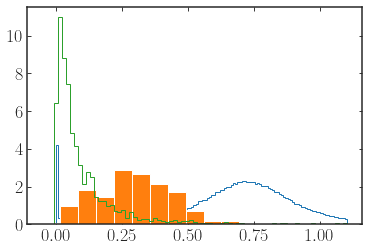

In [53]:
h2=plt.hist(alldata.x, range=[-0.05, 1.1], density=True, bins='auto', histtype='step')
h3=plt.hist(cands.x, range=[-.05, 1.1], density=True, bins='auto')
h=plt.hist(spex.x, range=[-.05, 1.1], density=True, bins='auto', histtype='step')

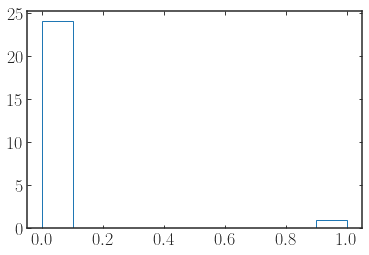

In [109]:
#h2=plt.hist(alldata.f_test,histtype='step', bins='auto', range=[0.0, 1.], density=True)
#h=plt.hist(spex.f_test,  histtype='step', bins='auto',  range=[0.001, 1.], density=True)
h3=plt.hist(cands.f_test,  histtype='step',  range=[0.001, 1.], density=False)

In [69]:
dt=stars[(stars.f_test 0.1) &(stars.snr1>=3.)].reset_index(drop=True)
dt['spt']=(dt['spt']).apply(wisps.make_spt_number).apply(float)

In [70]:
len(spex[spex.f_test<.1])

2478

(-1.0, 4.0)

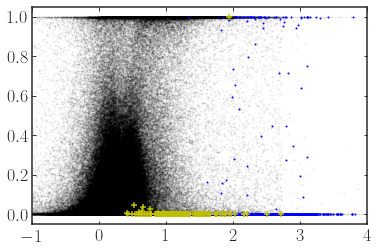

In [104]:
plt.scatter(alldata.snr1.apply(np.log10), alldata.f_test, s=1, c='k', alpha=0.05 )
plt.scatter(spex.snr1.apply(np.log10), spex.f_test, s=1, c='b' )


plt.scatter(cands.snr1.apply(np.log10), cands.f_test, c='y', marker='+' )
plt.xlim([-1, 4])

In [72]:
#get criteria 
##only run this if new data
gbhio=sel_crt.save_criteria(conts=dt)
crts=sel_crt.crts_from_file()
contamns=pd.DataFrame([ x.contamination for x in crts.values()])
compls=pd.DataFrame([ x.completeness for x in crts.values()])

contamns.index=[x for x in crts.keys()]
compls.index=[x for x in crts.keys()]

  0%|          | 0/120 [00:00<?, ?it/s]

(2452, 33) (113, 33)


100%|██████████| 120/120 [00:28<00:00,  4.21it/s]


In [73]:
len(alldata), len(stars), len(dt), len(stars[stars.snr1>3.])

(254264, 104346, 887, 45344)

In [74]:
%%capture
'''
contamns.style.apply(lambda x: ["background-color: #7FDBFF" 
                          if (i >= 0 and (v < 0.1 
                                          and v > 0. )) 
                          else "" for i, v in enumerate(x)], axis = 1)
'''

In [75]:

from collections import OrderedDict
dict(contamns.idxmin(axis=0))# the least contaminated criteria
#add new criteria to avoid repet
to_use_unordered=dict(contamns.idxmin(axis=0))
ordered=OrderedDict((k, to_use_unordered[k]) for k in ['M7-L0', 'L0-L5', 'L5-T0', 'T0-T5', 'T5-T9', 'Y dwarfs', 'subdwarfs'])

In [76]:
#copy paste the best indices here manually

to_use=  {value: key for key, value in dict(ordered).items() if key !='trash'}

In [77]:
#check for repeated keywords
to_use

{'CH_4/H-Cont H_2O-1+H_2O-2/J-Cont': 'M7-L0',
 'H-cont/H_2O-2 CH_4/H-Cont': 'L0-L5',
 'CH_4/H_2O-2 H_2O-2+CH_4/J-Cont': 'L5-T0',
 'CH_4/H_2O-2 H_2O-1+H_2O-2/J-Cont': 'T0-T5',
 'H-cont/H_2O-1 H_2O-1+CH_4/H-Cont': 'T5-T9',
 'H_2O-1/J-Cont H_2O-1+CH_4/H-Cont': 'Y dwarfs',
 'H_2O-1/J-Cont H-cont/J-Cont': 'subdwarfs'}

In [78]:
len(to_use)

7

In [79]:
import pickle
#save the random forest
output_file=wisps.OUTPUT_FILES+'/best_indices_to_use.pkl'
with open(output_file, 'wb') as file:
    pickle.dump(to_use,file)

In [80]:
fp={}

In [81]:
def plot_index_box(index_name, box_name, ax):
    
    #get the index and the box
    idx=crts[index_name]
    bx=[x for x in idx.shapes if x.shape_name==box_name][0]
    
    xkey=idx.xkey
    ykey=idx.ykey

    to_use_df=spex_df
    if box_name.lower()=='y dwarfs':
        to_use_df=ydwarfs
    if box_name.lower()=='subdwarfs':
        to_use_df=wisps.Annotator.reformat_table(idx.subdwarfs)
        to_use_df['spt']=17
        
    xlim=[ bx.xrange[0]-.5*abs(np.ptp(bx.xrange)), bx.xrange[1]+.5*abs(np.ptp(bx.xrange))]
    ylim=[ bx.yrange[0]-.5*abs(np.ptp(bx.yrange)), bx.yrange[1]+.5*abs(np.ptp(bx.yrange))]
    
    if box_name.upper()=='T5-T9':
        print ('changin scale')
        print (bx.xrange[1])
        xlim=[ bx.xrange[0]-0.2*abs(np.ptp(bx.xrange)), np.round(bx.xrange[1]+0.2*abs(np.ptp(bx.xrange)))]

    
    #remove nans from background
    bckgrd= dt[[xkey, ykey]].replace(-np.inf, np.nan).replace(np.inf, np.nan).dropna()
    
    bckgrd=bckgrd[(bckgrd[xkey].between(xlim[0], xlim[1])) & (bckgrd[ykey].between(ylim[0], ylim[1]))]

    h=ax.hist2d(bckgrd[xkey].apply(float).values, bckgrd[ykey].apply(float).values, cmap='gist_yarg')
    
    cands_slctd, cands_bools=bx._select(np.array([cands[xkey].values,cands[ykey].values]))
   
    trash_slctd, trsh_bools=bx._select(np.array([dt[xkey].values, dt[ykey].values]))
    
    #simul_slctd, simul_bools=bx._select(np.array([simulated_data[xkey].values, simulated_data[ykey].values]))
    
    
    cands_in_that_class_bool=(cands[ cands_bools]).spt.apply(lambda x: wisps.is_in_that_classification(x, box_name))
    
    spexs_slctd_in_that_class_bool= (to_use_df).spt.apply(lambda x: wisps.is_in_that_classification(x, box_name))
    
    #simulated_in_that_class_bool=(simulated_data[simul_bools]).spt.apply(lambda x: wisps.is_in_that_classification(x, box_name))
    
    if box_name.lower()=='subdwarfs':
         spexs_slctd_in_that_class_bool=np.ones(len(to_use_df), dtype=bool)
    
    
    
    
    cands_in_that_class=np.array([cands_slctd[0][cands_in_that_class_bool], cands_slctd[1][cands_in_that_class_bool]])
    
    #simulated_in_that_class= np.array([simul_slctd[0][simulated_in_that_class_bool], simul_slctd[1][simulated_in_that_class_bool]])
    
    spexs_slctd_in_that_class=np.array([to_use_df[xkey][spexs_slctd_in_that_class_bool], to_use_df[ykey][spexs_slctd_in_that_class_bool]])
    

    #ax.scatter( simulated_in_that_class[0],    simulated_in_that_class[1], facecolors='none', s=10, 
    #           edgecolors='#001f3f', label='simulated')
    
    ax.scatter(spexs_slctd_in_that_class[0], spexs_slctd_in_that_class[1], facecolors='#0074D9',  label='SpeX', s=30.)
    
    ax.scatter(cands[xkey], cands[ykey], marker='x', facecolors='#FF851B', s=40., alpha=0.5)
    
    
    ax.scatter( cands_in_that_class[0],    cands_in_that_class[1], marker='x', facecolors='#FF851B', s=40, 
               edgecolors='#FF4136', label='candidates')
    
    
    
    
    bx.color='None'
    bx.alpha=1.
    bx.linewidth=3
    bx.linestyle='-'
    bx.edgecolor='#0074D9'
    bx.plot(ax=ax, only_shape=True, highlight=False)
    
    cb = plt.colorbar(h[3], ax=ax, orientation='horizontal')
    cb.set_label('Counts in bin', fontsize=16)
    
    plt.tight_layout()
    
    ax.set_xlabel(r'$'+str(idx.name.split(' ')[0])+'$', fontsize=14)
    ax.set_ylabel(r'$'+str(idx.name.split(' ')[1])+'$', fontsize=14)
    
    ax.set_title(box_name, fontsize=18)
    
    xbuffer=np.nanstd(to_use_df[[xkey,ykey]])
    
   
    
    ax.minorticks_on()
    

    if (trash_slctd.shape[1])==0:
        fprate=0.0
    else:
        fprate=(trash_slctd.shape[1]- cands_slctd.shape[1])/trash_slctd.shape[1]
        if box_name.lower()=='subdwarfs':
                fprate=1.
    
    fp[box_name]=  fprate
    
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    plt.tight_layout()
    print (' {} selected {}'.format(box_name, len(bx.select( bckgrd))))
    
    return {str(box_name): bx}
    
    

 M7-L0 selected 74
 L0-L5 selected 59
 L5-T0 selected 20
 T0-T5 selected 7
changin scale
12.351100394028286
 T5-T9 selected 2
 Y dwarfs selected 1
 subdwarfs selected 75


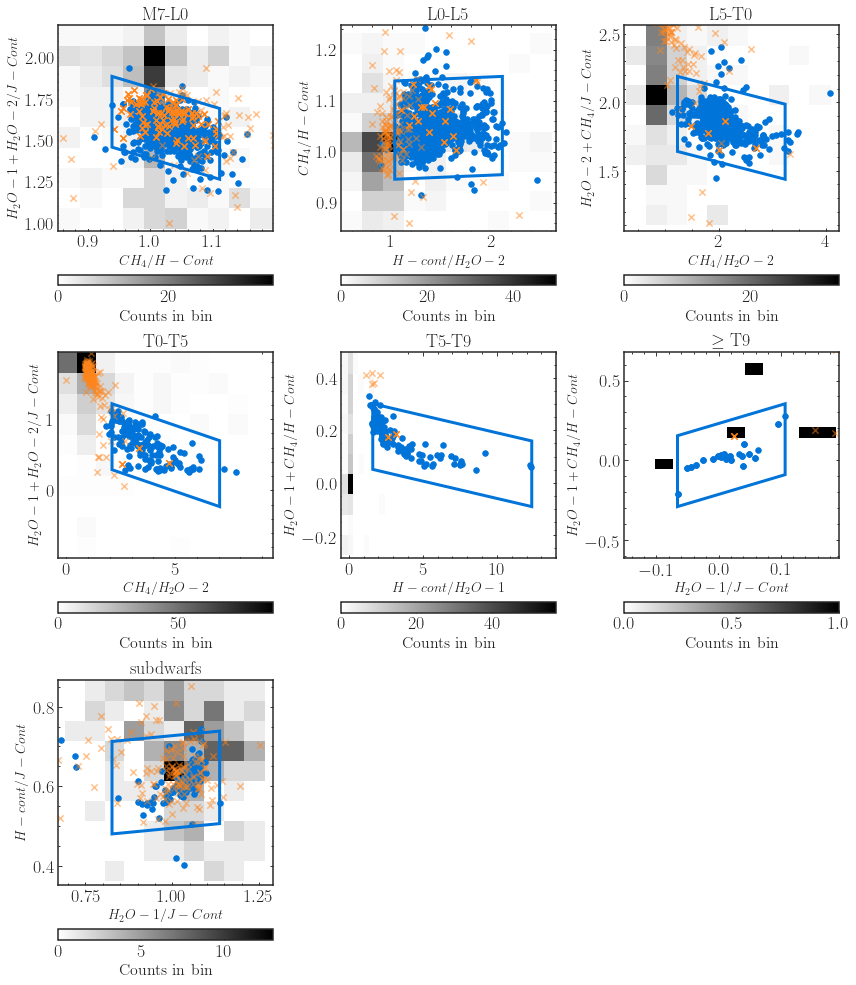

In [82]:
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(12, 14))

bxs=[]
for idx, k in enumerate(to_use.keys()):
    b=plot_index_box( k, to_use[k], np.concatenate(ax)[idx])
    bxs.append(b)



plt.tight_layout()


fig.delaxes(np.concatenate(ax)[-1])
fig.delaxes(np.concatenate(ax)[-2])

np.concatenate(ax)[-4].set_title(r'$\geq$ T9 ', fontsize=18)
#subdindx_index_crt=crts['H_2O-1/J-Cont H_2O-2/H_2O-1']
#subdrfs=wisps.Annotator.reformat_table(dummy_index_crt.subdwarfs)
#tpls=wisps.Annotator.reformat_table(spex_df[spex_df.metallicity_class.isna()])
#a=np.concatenate(ax)[-1]
#tpls=tpls[tpls.spt>16]

#a.scatter(dt[subdindx_index_crt.xkey], dt[subdindx_index_crt.ykey], s=1., c='#111111', alpha=0.1)
#a.scatter(tpls[subdindx_index_crt.xkey], tpls[subdindx_index_crt.ykey], marker='+', facecolors='#0074D9',  label='SpeX', s=5.)
#a.scatter(subdrfs[subdindx_index_crt.xkey], subdrfs[subdindx_index_crt.ykey], marker='+', facecolors='#2ECC40',  label='SpeX', s=30.)


#a.set_xlim([0., 1.35])
#a.set_ylim([0., 1.25])
#a.set_title('subdwarfs', fontsize=18)
#a.set_xlabel(r'$'+str(subdindx_index_crt.name.split(' ')[0])+'$', fontsize=15)
#a.set_ylabel(r'$'+str(subdindx_index_crt.name.split(' ')[1])+'$', fontsize=15)
    

plt.savefig(wisps.OUTPUT_FIGURES+'/index_index_plots.pdf', bbox_inches='tight', rasterized=True)

In [83]:
common=dt[dt.grism_id.isin(cands.grism_id)]

In [84]:
#.grism_id.to_csv('/users/caganze/desktop/true_brown_dwarfs.csv')

In [85]:
bx_dict={}
for b in bxs:
    bx_dict.update(b)

In [86]:
#invert to use
inv_to_use = {v: k for k, v in to_use.items()}

In [87]:
ncandidates=[]
for spt_range in bx_dict.keys():
    idx_name=inv_to_use[spt_range]
    idx=crts[idx_name]
    s, bools=(bx_dict[spt_range])._select(np.array([dt[idx.xkey].values, dt[idx.ykey].values]))
    ncandidates.append(dt[bools])

In [90]:
candsss=(pd.concat(ncandidates).drop_duplicates(subset='grism_id'))
cands.grism_id=cands.grism_id.apply(lambda x: x.lower().strip())
good_indices=[crts[x] for x in inv_to_use.values()]

In [92]:
len(candsss), len(candsss[candsss.grism_id.isin(cands.grism_id.apply(lambda x: x.lower().strip())) & (candsss.spt.apply(wisps.make_spt_number)>16)])

(170, 21)

In [93]:
len(candsss.drop_duplicates('grism_id'))/len(alldata)

0.0006685964194695277

In [95]:
len(candsss[candsss.grism_id.isin(cands.grism_id) & (candsss.spt.apply(wisps.make_spt_number)>=17)])

21

In [96]:
candsss.to_pickle(wisps.OUTPUT_FILES+'/selected_by_indices.pkl')

In [97]:
#print out table
def round_tuple(tpl, n=2):
    return round(tpl[0], n), round(tpl[1],n)

for sindex, k in zip(good_indices, to_use.keys()):
   
    spt_range=to_use[k]
    bs=sindex.shapes
    bs=[x for x in bs if x.shape_name==spt_range]

    bx=bs[0]
    
    print (" {} & {} &  {} & {} & {} & {} & {} & {} & {}  & {} \\\ ".format(spt_range,sindex.xkey, sindex.ykey, 
                                                                           round_tuple(bx.vertices[0]), round_tuple(bx.vertices[1])
                                                                          , round_tuple(bx.vertices[2]), round_tuple(bx.vertices[3]),
                                                                          round(sindex.completeness[spt_range], 2), 
                                                                            round(sindex.contamination[spt_range], 6), 
                                                                           round(fp[spt_range],6)))
    

 M7-L0 & CH_4/H-Cont &  H_2O-1+H_2O-2/J-Cont & (0.94, 1.89) & (1.11, 1.69) & (1.11, 1.26) & (0.94, 1.46) & 0.97 & 0.112426  & -0.445946 \\ 
 L0-L5 & H-cont/H_2O-2 &  CH_4/H-Cont & (1.03, 1.14) & (2.11, 1.15) & (2.11, 0.95) & (1.03, 0.95) & 0.97 & 0.067364  & 0.067797 \\ 
 L5-T0 & CH_4/H_2O-2 &  H_2O-2+CH_4/J-Cont & (1.23, 2.19) & (3.24, 1.99) & (3.24, 1.44) & (1.23, 1.64) & 0.95 & 0.02061  & 0.5 \\ 
 T0-T5 & CH_4/H_2O-2 &  H_2O-1+H_2O-2/J-Cont & (2.1, 1.22) & (7.05, 0.7) & (7.05, -0.23) & (2.1, 0.29) & 0.97 & 0.001726  & -0.142857 \\ 
 T5-T9 & H-cont/H_2O-1 &  H_2O-1+CH_4/H-Cont & (1.62, 0.3) & (12.35, 0.16) & (12.35, -0.09) & (1.62, 0.05) & 0.96 & 7e-05  & 0.0 \\ 
 Y dwarfs & H_2O-1/J-Cont &  H_2O-1+CH_4/H-Cont & (-0.07, 0.15) & (0.11, 0.35) & (0.11, -0.09) & (-0.07, -0.29) & 0.91 & 3.5e-05  & 0.0 \\ 
 subdwarfs & H_2O-1/J-Cont &  H-cont/J-Cont & (0.83, 0.71) & (1.14, 0.74) & (1.14, 0.51) & (0.83, 0.48) & 0.94 & 0.226523  & 1.0 \\ 


In [100]:
cands_dff=(cands[np.logical_and(cands['snr1'] >=3., cands['spt'] >=17)]).sort_values('spt')
spex_df=spex_df.sort_values('spt')

star_snr=stars[['snr1', 'snr2', 'snr3', 'snr4']].apply(np.log10).dropna()
star_snr=(star_snr[star_snr.snr1.between(-1, 4) & star_snr.snr3.between(-1, 4) & star_snr.snr4.between(-1, 4)]).reset_index(drop=True)

In [101]:
spex_df=spex_df[spex_df.spt >=16]

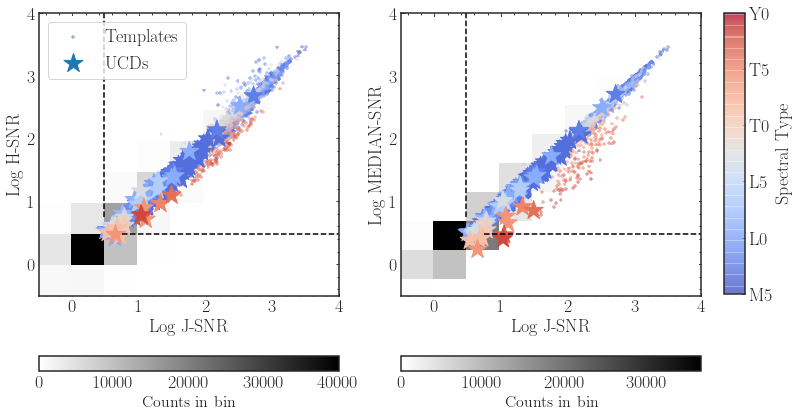

In [102]:
fig, (ax, ax1)=plt.subplots(ncols=2, figsize=(10, 6))

h=ax.hist2d(star_snr['snr1'], star_snr['snr3'], cmap='gist_yarg', bins=10, label='Point Sources')

cb = plt.colorbar(h[3], ax=ax, orientation='horizontal')
cb.set_label('Counts in bin', fontsize=16)
plt.tight_layout()

#ax.scatter(star_snr['snr1'],  star_snr['snr4'], s=1., c='k', alpha=0.1, 
#            label='3D-HST or WISP')


ax.scatter(spex_df['snr1'].apply(np.log10), spex_df['snr3'].apply(np.log10),
           marker='+', s=15, c=spex_df.spt, 
           cmap='coolwarm', label='Templates', alpha=0.5, vmin=15, vmax=40) 
ax.scatter(cands_dff['snr1'].apply(np.log10), cands_dff['snr3'].apply(np.log10), 
           c=cands_dff['spt'], s=400,  marker='*', cmap='coolwarm', label='UCDs'
           , vmin=15, vmax=40) 
ax.set_xlim([-0.5, 4])
ax.set_ylim([-0.5, 4])
ax.set_xlabel('Log J-SNR', fontsize=18)
ax.set_ylabel('Log H-SNR', fontsize=18)
ax.legend(fontsize=18, loc='upper left')

ax.axhline(np.log10(3), c='k', xmin=np.log10(3)-0.2, linestyle='--')
ax.axvline(np.log10(3), c='k', ymin=np.log10(3)-0.2, linestyle='--')



#ax1.scatter(stars['snr1'].apply(np.log10), stars['snr4'].apply(np.log10), s=1., c='k', alpha=0.1, 
#            label='3D-HST or WISP')

h1=ax1.hist2d(star_snr['snr1'], star_snr['snr4'], cmap='gist_yarg', bins=10, label='Point Sources')
mp=ax1.scatter(spex_df['snr1'].apply(np.log10), spex_df['snr4'].apply(np.log10), marker='+', s=15, c=spex_df.spt, 
            cmap='coolwarm', label='Templates', alpha=0.5, vmin=15, vmax=40) 

ax1.scatter(cands_dff['snr1'].apply(np.log10), cands_dff['snr4'].apply(np.log10), 
                       c=cands_dff['spt'], s=400, marker='*', cmap='coolwarm', label='UCDs',  vmin=15, vmax=40) 
ax1.set_xlim([-0.5, 4])
ax1.set_ylim([-0.5, 4])
ax1.set_xlabel(' Log J-SNR', fontsize=18)
ax1.set_ylabel('Log MEDIAN-SNR', fontsize=18)
#ax.legend(fontsize=18)

ax1.axhline(np.log10(3), c='k', xmin=np.log10(3)-0.2, linestyle='--')
ax1.axvline(np.log10(3), c='k', ymin=np.log10(3)-0.2, linestyle='--')

cb1 = plt.colorbar(h1[3], ax=ax1, orientation='horizontal')
cb1.set_label('Counts in bin', fontsize=16)
plt.tight_layout()

cax = fig.add_axes([1.01, 0.31, .03, 0.65])
cbar=plt.colorbar(mp, cax=cax, orientation='vertical')
cbar.ax.set_ylabel(r'Spectral Type', fontsize=18)

ax.minorticks_on()
ax1.minorticks_on()

#cbar.ax.set_yticks([ 17, 20, 25, 30, 35, 40])
cbar.ax.set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/snr_cutplots.pdf', bbox_inches='tight', rasterized=True)